In [1]:
import mne
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from mne.datasets import sample
from mne.decoding import cross_val_multiscore, LinearModel, GeneralizingEstimator, Scaler, \
                         Vectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score, StratifiedShuffleSplit, \
                                    RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

# Autocorrelation

In [3]:
# https://stackoverflow.com/questions/30143417/computing-the-correlation-coefficient-between-two-multi-dimensional-arrays
def generate_correlation_map(x, y):
    """Correlate each n with each m.

    Parameters
    ----------
    x : np.array
      Shape N X T.

    y : np.array
      Shape M X T.

    Returns
    -------
    np.array
      N X M array in which each element is a correlation coefficient.

    """
    mu_x = x.mean(1)
    mu_y = y.mean(1)
    n = x.shape[1]
    if n != y.shape[1]:
        raise ValueError('x and y must ' +
                         'have the same number of timepoints.')
    s_x = x.std(1, ddof=n - 1)
    s_y = y.std(1, ddof=n - 1)
    cov = np.dot(x,
                 y.T) - n * np.dot(mu_x[:, np.newaxis],
                                  mu_y[np.newaxis, :])
    return cov / np.dot(s_x[:, np.newaxis], s_y[np.newaxis, :])

In [4]:
def set_fonts():
    from matplotlib.font_manager import FontProperties
    font = FontProperties()
    font.set_family('serif')
    font.set_name('Calibri')
    return font

def plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax):
    
    font=set_fonts()
    fsize_t=30
    fsize_x=26
    
    # EARLY ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_e[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_e[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_e[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_e[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Testing Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_e = np.mean(avgmap_e, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_e, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'earlyBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()
    
    # LATER ==================================================================================
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    ax = axs[0][0]
    im = ax.imshow(avgmap_l[0,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc1', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[0][1]
    im = ax.imshow(avgmap_l[1,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_title('Loc2', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')

    
    ax = axs[1][0]
    im = ax.imshow(avgmap_l[2,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc3', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    ax = axs[1][1]
    im = ax.imshow(avgmap_l[3,:,:], interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Loc4', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    ax.xaxis.set_ticks_position('bottom')
    plt.colorbar(im, ax=ax)

    
    avggrp_l = np.mean(avgmap_l, axis=0)
    ax = axs[2][0]
    im = ax.imshow(avggrp_l, interpolation='lanczos', origin='lower', cmap='RdBu_r',
                   extent=subset.times[[0, -1, 0 , -1]], vmin=vmin, vmax=vmax)
    ax.set_xlabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_ylabel('Time (s)', fontproperties=font, fontsize=fsize_x, fontweight='bold')
    ax.set_title('Average', fontproperties=font, fontsize=fsize_t, fontweight='bold')
    ax.axvline(0, color='k')
    ax.axhline(0, color='k')
    plt.colorbar(im, ax=ax)
    ax.xaxis.set_ticks_position('bottom')
    
    fig.delaxes(axs[2][1])
    plt.tight_layout()
    plt.suptitle( 'laterBlocks   -    ' + title, fontproperties=font, fontsize=fsize_t, fontweight='bold',  y=1.05)
    plt.tight_layout()


    plt.show()

In [5]:
# SAVE_EPOCH_ROOT = '../../data/preprocessed/epochs/aft_ICA_rej/'
SAVE_EPOCH_ROOT = '../../data/version5.2/preprocessed/epochs/aft_ICA_rej/'
filename_epoch = SAVE_EPOCH_ROOT +  'epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif'

#Read Epochs
epochs_orig = mne.read_epochs(filename_epoch, proj=True, preload=True, verbose=None)
epochs = epochs_orig.copy()

Reading ../../data/version5.2/preprocessed/epochs/aft_ICA_rej/epochs_sec_applyBaseline_subj1-afterRejICA-epo.fif ...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 129) active
    Found the data of interest:
        t =    -400.00 ...    5000.00 ms
        0 CTF compensation matrices available
1197 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1197 matching events found
Applying baseline correction (mode: mean)
Adding metadata with 16 columns
Created an SSP operator (subspace dimension = 1)
1 projection items activated


## Some preprocessing

In [6]:
subset = epochs['pred']['non'].copy()
subset = subset.pick_types(eeg=True)
subset.crop(tmin=-0.4,tmax=0.5)

if subset['Block==6'].metadata.Ptrn_Type.values.shape[0]>0:
       main_ptrn = subset['Block==6'].metadata.Ptrn_Type.values[0]
else:
       main_ptrn = subset['Block==8'].metadata.Ptrn_Type.values[0]

In [7]:
# print('main pattern', main_ptrn)
# print('--------------------------------')
# print('Trgt_Loc_main', subset.metadata.Trgt_Loc_main)
# # 1 3 4 2 3 1 2 4 1 3 4 
# print('--------------------------------')
# # 1 3 4 2 3 1 2 4 1 3 4 
# print('Trgt_Loc', subset.metadata.Trgt_Loc)
# print('--------------------------------')
# print('Trgt_Loc_prev', subset.metadata.Trgt_Loc_prev)
# # 2 1 3 4 2 3 1 2 4 1 3 

## Group by current main location

In [8]:
# str_feat = 'Trgt_Loc_main'

# # only early blocks
# subsetE = subset['Block>2 & Block<7'].copy()
# dtset = subsetE.copy()

# iind=0
# dt0 = dtset['%s==%s' %(str_feat, iind+1)]._data.copy()
# dt0 = dt0[:84,:,:]

# iind=1
# dt1 = dtset['%s==%s' %(str_feat, iind+1)]._data.copy()
# dt1 = dt1[:84,:,:]

# print(dt0.shape)
# print(dt1.shape)
# # print(dt1-dt0)

# for iloc in range(2):
#         print(iloc)
#         dt = dtset['%s==%s' %(str_feat, iind+1)]._data.copy()
#         dt = dt[:84,:,:]
# #         print(dt)

# print(dt1-dt)

In [9]:
from scipy.signal import savgol_filter

def group_data(dtset, str_feat):
    inds = np.zeros((4,1))
    for iind in range(4):
        inds[iind] = dtset['%s==%s' %(str_feat, iind+1)]._data.shape[0]


    ind1=int(min(inds))
    ind2=dtset['%s==1' %(str_feat)]._data.shape[1]
    ind3=dtset['%s==1' %(str_feat)]._data.shape[2]
    print(ind1)

    grped_dtset = np.zeros((4, ind1, ind2, ind3))
    avg_grped_dtset = np.zeros((4, ind2, ind3))
    smooth_grped_dtset = np.zeros((5, ind3))
    print('smooth_grped_dtset', smooth_grped_dtset.shape)
    dtset_o = dtset.copy()
    
    for iloc in range(4):
        dtset = dtset_o.copy()
        print(iloc)
        
        dt = dtset['%s==%s' %(str_feat, iloc+1)]._data.copy()
        
        #  normalize
        dt = (dt - np.mean(dt)) / np.std(dt)
        
        #  select based on the mimium num of loc
        dt = dt[:ind1,:,:].copy()
        
        grped_dtset[iloc,:,:,:] = dt
        
    avg1 = np.mean(grped_dtset.copy(), axis=1)
    avg_grped_dtset = avg1
    # TODO: update scipy, some parts will be deprecated
    avg = np.mean(avg1, axis=1)
    smooth_grped_dtset[:-1,:] = savgol_filter(avg, 7, 3) 
    print('smooth_grped_dtset', smooth_grped_dtset.shape)
    print(avg_grped_dtset.shape)
    tot_avg = np.mean(avg_grped_dtset, axis=0)    
    print(tot_avg.shape)
    tot_avg = np.mean(tot_avg, axis=0)    
    smooth_grped_dtset[4,:] = savgol_filter(tot_avg, 7, 3) 
        
    print('grped_dtset', grped_dtset.shape)
    print('avg_grped_dtset', avg_grped_dtset.shape)
    print('smooth_grped_dtset', smooth_grped_dtset.shape)
    return [grped_dtset, avg_grped_dtset, smooth_grped_dtset]

In [10]:
# only early blocks
subsetE = subset['Block>2 & Block<7'].copy()
dtsetE = subsetE.copy()
str_feat = 'Trgt_Loc_main'

[gdtE, avggdtE, sgdtE] = group_data(dtsetE, str_feat)

84
smooth_grped_dtset (5, 226)
0
1
2
3
smooth_grped_dtset (5, 226)
(4, 129, 226)
(129, 226)
grped_dtset (4, 84, 129, 226)
avg_grped_dtset (4, 129, 226)
smooth_grped_dtset (5, 226)


/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [11]:
# print(sgdtE)


In [11]:
# only later blocks
subsetL = subset['Block>6& Block<11'].copy()
dtsetL = subsetL.copy()
str_feat = 'Trgt_Loc_main'

[gdtL, avggdtL, sgdtL]  = group_data(dtsetL, str_feat)

87
smooth_grped_dtset (5, 226)
0
1
2
3
smooth_grped_dtset (5, 226)
(4, 129, 226)
(129, 226)
grped_dtset (4, 87, 129, 226)
avg_grped_dtset (4, 129, 226)
smooth_grped_dtset (5, 226)


/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [14]:
avggdtD = avggdtL - avggdtE

print(avggdtD.shape)

(4, 129, 226)


In [15]:
ind1=min( [Loc1_E._data.shape[0], Loc2_E._data.shape[0] , \
           Loc3_E._data.shape[0], Loc4_E._data.shape[0]] )

# only early blocks
subsetE = subset['Block>2 & Block<7'].copy()

# Group data based on the current main loc
Loc1_E = subsetE['Trgt_Loc_main==1'].copy()
Loc2_E = subsetE['Trgt_Loc_main==2'].copy()
Loc3_E = subsetE['Trgt_Loc_main==3'].copy()
Loc4_E = subsetE['Trgt_Loc_main==4'].copy()

Loc1_E._data = Loc1_E._data[:ind1,:,:]
Loc2_E._data = Loc2_E._data[:ind1,:,:]
Loc3_E._data = Loc3_E._data[:ind1,:,:]
Loc4_E._data = Loc4_E._data[:ind1,:,:]

Loc1_E._data = (Loc1_E._data - np.mean(Loc1_E._data)) / np.std(Loc1_E._data)
Loc2_E._data = (Loc2_E._data - np.mean(Loc2_E._data)) / np.std(Loc2_E._data)
Loc3_E._data = (Loc3_E._data - np.mean(Loc3_E._data)) / np.std(Loc3_E._data)
Loc4_E._data = (Loc4_E._data - np.mean(Loc4_E._data)) / np.std(Loc4_E._data)

In [16]:
# only later blocks
subsetL = subset['Block>6 & Block<11'].copy()
# subsetL = subset['Block>6'].copy()

# Group data based on the current main loc
Loc1_L = subsetL['Trgt_Loc_main==1'].copy()
Loc2_L = subsetL['Trgt_Loc_main==2'].copy()
Loc3_L = subsetL['Trgt_Loc_main==3'].copy()
Loc4_L = subsetL['Trgt_Loc_main==4'].copy()

Loc1_L._data = Loc1_L._data[:ind1,:,:]
Loc2_L._data = Loc2_L._data[:ind1,:,:]
Loc3_L._data = Loc3_L._data[:ind1,:,:]
Loc4_L._data = Loc4_L._data[:ind1,:,:]

Loc1_L._data = (Loc1_L._data - np.mean(Loc1_L._data)) / np.std(Loc1_L._data)
Loc2_L._data = (Loc2_L._data - np.mean(Loc2_L._data)) / np.std(Loc2_L._data)
Loc3_L._data = (Loc3_L._data - np.mean(Loc3_L._data)) / np.std(Loc3_L._data)
Loc4_L._data = (Loc4_L._data - np.mean(Loc4_L._data)) / np.std(Loc4_L._data)

In [17]:
ind1=min( [Loc1_E._data.shape[0], Loc2_E._data.shape[0] , \
           Loc3_E._data.shape[0], Loc4_E._data.shape[0]] )
ind2=Loc1_E._data.shape[1]
ind3=Loc1_E._data.shape[2]
avgp1_autcrr = np.zeros((4, ind1, ind2, ind3))
avgp1_autcrr[0,:,:,:]=Loc1_E._data[:ind1,:,:]
avgp1_autcrr[1,:,:,:]=Loc2_E._data[:ind1,:,:]
avgp1_autcrr[2,:,:,:]=Loc3_E._data[:ind1,:,:]
avgp1_autcrr[3,:,:,:]=Loc4_E._data[:ind1,:,:]
print(avgp1_autcrr.shape)
avgE = avgp1_autcrr.copy()
avgact_e = np.mean(avgp1_autcrr, axis=1)

ind1=min( [Loc1_L._data.shape[0], Loc2_L._data.shape[0] , \
           Loc3_L._data.shape[0], Loc4_L._data.shape[0]] )
ind2=Loc1_L._data.shape[1]
ind3=Loc1_L._data.shape[2]
avgp1_autcrr = np.zeros((4, ind1, ind2, ind3))
avgp1_autcrr[0,:,:,:]=Loc1_L._data[:ind1,:,:]
avgp1_autcrr[1,:,:,:]=Loc2_L._data[:ind1,:,:]
avgp1_autcrr[2,:,:,:]=Loc3_L._data[:ind1,:,:]
avgp1_autcrr[3,:,:,:]=Loc4_L._data[:ind1,:,:]
print(avgp1_autcrr.shape)
avgL = avgp1_autcrr.copy()
avgact_l = np.mean(avgp1_autcrr, axis=1)

avgact_d = avgact_l - avgact_e

(4, 84, 129, 226)
(4, 84, 129, 226)


In [18]:
print(avgact_e.shape)
print(avgact_l.shape)
print(avgact_d.shape)
print(avgE.shape, avgL.shape)
print((gdtE.shape, avggdtE.shape, sgdtE.shape))

(4, 129, 226)
(4, 129, 226)
(4, 129, 226)
(4, 84, 129, 226) (4, 84, 129, 226)
((4, 84, 129, 226), (4, 129, 226), (5, 226))


In [19]:
# print(avgact_e - avggdtE)
print(gdtE - avgE)

[[[[-1.06662338e-03 -3.80662642e-04 -4.32823578e-04 ...  7.01902663e-03
     2.76001978e-03  6.35918985e-03]
   [-3.84423757e-03 -4.62384848e-03 -3.14968510e-03 ... -5.15824024e-03
    -3.67156755e-03 -1.09090908e-03]
   [-2.52024036e-03 -3.60796133e-03 -2.64495343e-03 ... -5.07840332e-03
    -5.97745828e-03 -2.06670797e-03]
   ...
   [ 9.68024896e-03  1.22052765e-02  9.24070274e-03 ...  6.36816866e-03
     1.20536191e-02  1.18310254e-02]
   [ 1.31783036e-02  1.07498576e-02  6.89090622e-03 ...  3.81643408e-03
     8.63155764e-03  7.00446977e-03]
   [ 1.23269579e-03  3.30814301e-04 -1.00313414e-03 ...  9.51991224e-04
    -7.94597257e-04  1.33317857e-04]]

  [[ 4.27868483e-03  2.78942785e-03 -9.61540999e-04 ...  3.26454344e-03
     4.07562678e-03  3.04332880e-03]
   [-5.42220561e-03 -1.67242971e-03 -3.92374896e-03 ...  1.61000596e-03
     2.25874166e-03  1.97213648e-03]
   [-2.92460960e-03 -1.69738852e-03 -4.15104715e-03 ...  9.59005771e-05
     1.76862188e-03  1.04652995e-03]
   ...
   

In [20]:
def prep_group_data(dtset, str_feat):
    
    # Group data based on the current main loc
    Loc1 = dtset['%s==1' %(str_feat)].copy()
    Loc2 = dtset['%s==2' %(str_feat)].copy()
    Loc3 = dtset['%s==3' %(str_feat)].copy()
    Loc4 = dtset['%s==4' %(str_feat)].copy()

    inds = np.zeros((4,1))
    for iind in range(4):
        inds[iind] = dtset['%s==%s' %(str_feat, iind+1)]._data.shape[0]


    ind1=int(min(inds))
    ind2=dtset['%s==1' %(str_feat)]._data.shape[1]
    ind3=dtset['%s==1' %(str_feat)]._data.shape[2]
    print(ind1)
    
    Loc1._data = Loc1._data[:ind1,:,:]
    Loc2._data = Loc2._data[:ind1,:,:]
    Loc3._data = Loc3._data[:ind1,:,:]
    Loc4._data = Loc4._data[:ind1,:,:]
    
    Loc1._data = (Loc1._data - np.mean(Loc1._data)) / np.std(Loc1._data)
    Loc2._data = (Loc2._data - np.mean(Loc2._data)) / np.std(Loc2._data)
    Loc3._data = (Loc3._data - np.mean(Loc3._data)) / np.std(Loc3._data)
    Loc4._data = (Loc4._data - np.mean(Loc4._data)) / np.std(Loc4._data)

    

    grped_dtset = np.zeros((4, ind1, ind2, ind3))

    grped_dtset[0,:,:,:]=Loc1._data
    grped_dtset[1,:,:,:]=Loc2._data
    grped_dtset[2,:,:,:]=Loc3._data
    grped_dtset[3,:,:,:]=Loc4._data
    print(grped_dtset.shape)
    avgact_dt = np.mean(grped_dtset, axis=1)


    evk_data = np.mean(avgact_dt, axis=1)
    smooth_evk = np.zeros((5, evk_data.shape[1]))
    smooth_evk[0,:] = savgol_filter(evk_data[0,:],33, 3) 
    smooth_evk[1,:] = savgol_filter(evk_data[1,:],33, 3) 
    smooth_evk[2,:] = savgol_filter(evk_data[2,:],33, 3) 
    smooth_evk[3,:] = savgol_filter(evk_data[3,:],33, 3) 
    smooth_evk[4,:] = savgol_filter(np.mean(evk_data, 0),23, 3)
    
    return grped_dtset, avgact_dt, smooth_evk

In [22]:
# args.smth_lvl = 33
# args.mtdt_feat

In [23]:
from scipy.signal import savgol_filter

str_feat = 'Trgt_Loc_main'

# only later blocks
dtset = subset['Block>6 & Block<11'].copy()

grped_dtsetL, avgact_dtL, smooth_evkL = prep_group_data(dtset, str_feat)

87
(4, 87, 129, 226)


/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


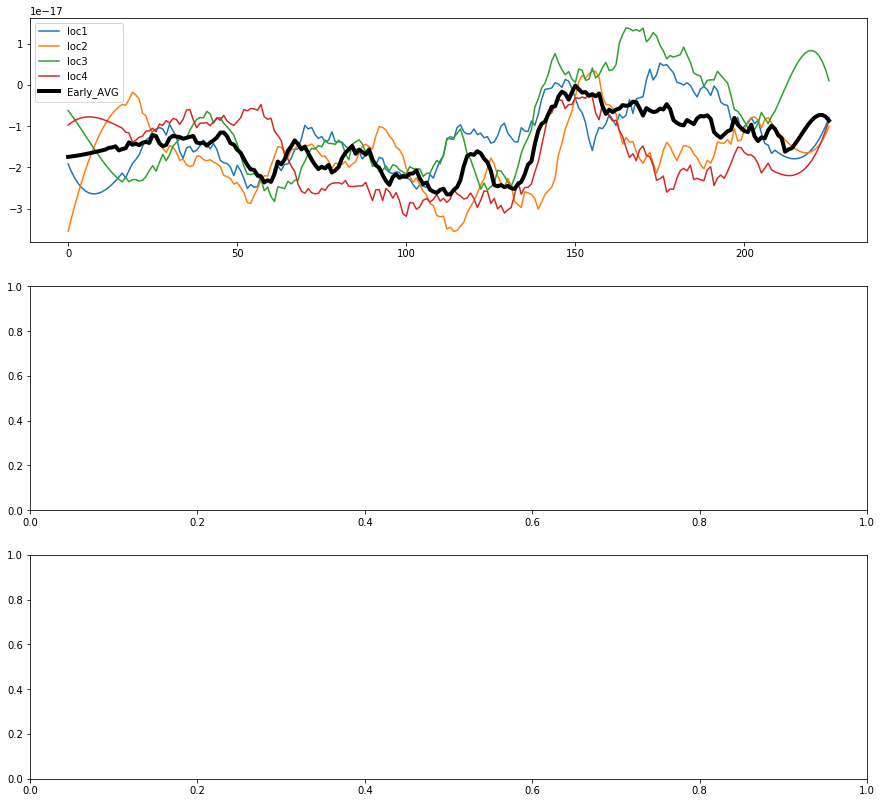

In [24]:
fig, ax = plt.subplots(3,1,figsize=(15,14))


ax[0].plot(smooth_evkL[0,:])
ax[0].plot(smooth_evkL[1,:])
ax[0].plot(smooth_evkL[2,:])
ax[0].plot(smooth_evkL[3,:])
ax[0].plot(smooth_evkL[4,:], color='black', linewidth=4.0)

ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')
# plt.show()

In [25]:
# print(avgact_l - avggdtL)
# print(gdtL - avgL)
print(avgact_dtL - avgact_l)

[[[-0.01614757 -0.01991843  0.00421068 ... -0.00548214 -0.00051149
   -0.00555177]
  [-0.01544779 -0.036361    0.00868674 ...  0.00527458  0.01260722
    0.00453861]
  [-0.01126738 -0.01430758 -0.00490145 ... -0.0004998  -0.00253912
   -0.00495504]
  ...
  [ 0.03330104  0.01354281  0.01576296 ...  0.00725144  0.00658221
    0.00265882]
  [-0.00537488 -0.0041076   0.00036271 ... -0.00063619  0.00091732
   -0.00057124]
  [-0.00229852  0.00953977 -0.00705071 ... -0.01334408 -0.00763795
   -0.0065991 ]]

 [[ 0.01461097  0.00308214 -0.00354387 ...  0.02027246  0.01079587
    0.01712114]
  [ 0.02351998  0.00142705  0.01584286 ...  0.02566959  0.00374005
    0.01412054]
  [ 0.00274529 -0.00310135 -0.00343979 ...  0.0136239   0.01687028
    0.01007593]
  ...
  [ 0.00045398 -0.02858826  0.00147806 ... -0.00502253 -0.00144473
   -0.00260342]
  [ 0.00020543 -0.01513352  0.00077718 ... -0.01815904 -0.00929249
   -0.01961861]
  [ 0.01187175  0.00855253 -0.00058712 ...  0.001419    0.00208009
    0.

(5, 226)
[[-5.98553240e-17 -2.44462176e-17 -1.28276045e-17 ...  2.00815534e-17
   1.27046562e-17 -2.58601229e-17]
 [ 1.88469477e-17  5.12796810e-18 -1.14239449e-18 ...  2.27454330e-18
   1.61676996e-17  2.93641490e-17]
 [-1.60959798e-17 -1.46615831e-17 -2.33909115e-17 ... -7.45886270e-18
   4.09827621e-19  3.11264078e-17]
 [-7.64226056e-17 -4.69303854e-17 -2.94102546e-17 ... -7.78672479e-18
  -4.40564692e-18  1.26431821e-17]
 [-3.01223301e-17 -1.43337210e-17 -1.46718288e-17 ...  5.94250050e-18
   3.60648306e-18  3.07370716e-18]]


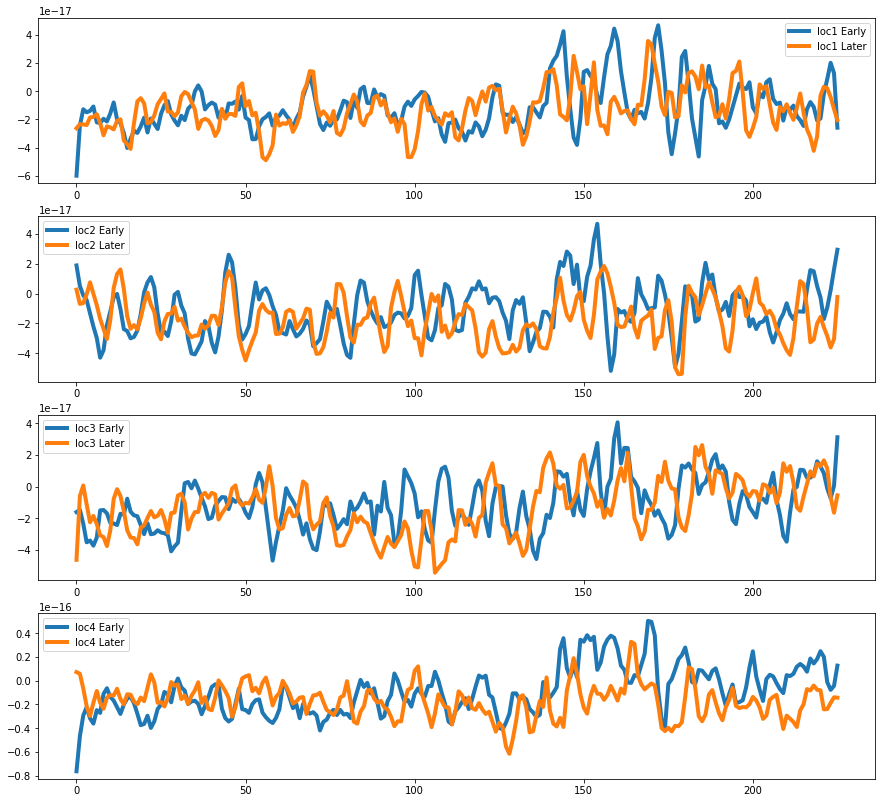

In [26]:
# avg_sgdtE = np.mean(sgdtE, axis= 1)
print(sgdtE.shape)
print(sgdtE)
# avg_sgdtL = np.mean(sgdtL, axis= 1)

fig, ax  = plt.subplots(4,1,figsize=(15,14))
for iloc in range(4):
    ax[iloc].plot(sgdtE[iloc,:], linewidth=4.)
    ax[iloc].plot(sgdtL[iloc,:], linewidth=4.)
    ax[iloc].legend(['loc%s Early' %(iloc+1), 'loc%s Later' %(iloc+1)])
    
    

In [27]:
# print(subset.times)

/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


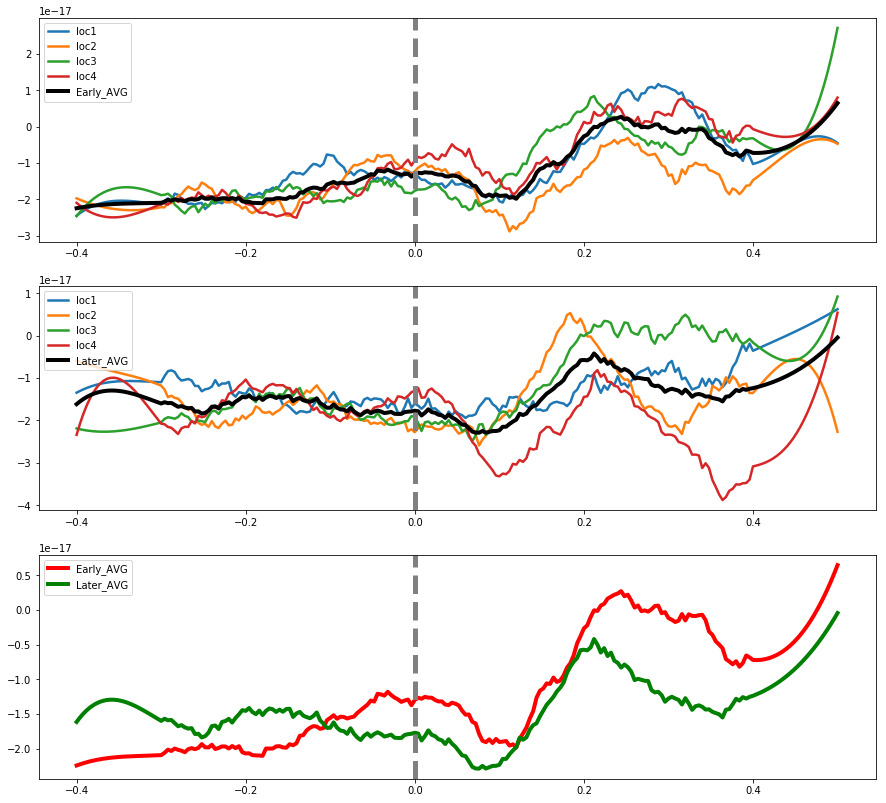

In [49]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(3,1,figsize=(15,14))

# window_length : int
# The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer.
# polyorder : int
# The order of the polynomial used to fit the samples. polyorder must be less than window_length.

# smooth_level = 11 # 11 * 4 = 45 ms
# smooth_level = 15 # 15 * 4 = 60 ms
# smooth_level = 25 # 25 * 4 = 100 ms
smooth_level = 51 # 51 * 4 = 204 ms

ply_order = 3
lw1=2.5
lw2=4

# window_length, polyorder

evk_data = np.mean(avgact_e, axis=1)
smooth_evk1 = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2 = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3 = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4 = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_e = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 
ax[0].plot(subset.times, smooth_evk1, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk2, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk3, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk4, linewidth=lw1)
ax[0].plot(subset.times, smooth_evkavg_e, color='black', linewidth=lw2)

ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')



evk_data = np.mean(avgact_l, axis=1)
smooth_evk1 = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2 = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3 = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4 = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_l = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 

ax[1].plot(subset.times, smooth_evk1, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk2, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk3, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk4, linewidth=lw1)
ax[1].plot(subset.times, smooth_evkavg_l, color='black', linewidth=lw2)

ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')
# plt.xticks(subset.times*1000)

ax[2].plot(subset.times, smooth_evkavg_e, color='red', linewidth=lw2)
ax[2].plot(subset.times, smooth_evkavg_l, color='green', linewidth=lw2)
ax[2].legend(['Early_AVG', 'Later_AVG'], loc='upper left')

for ii in range(3):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

/Users/Maryam/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


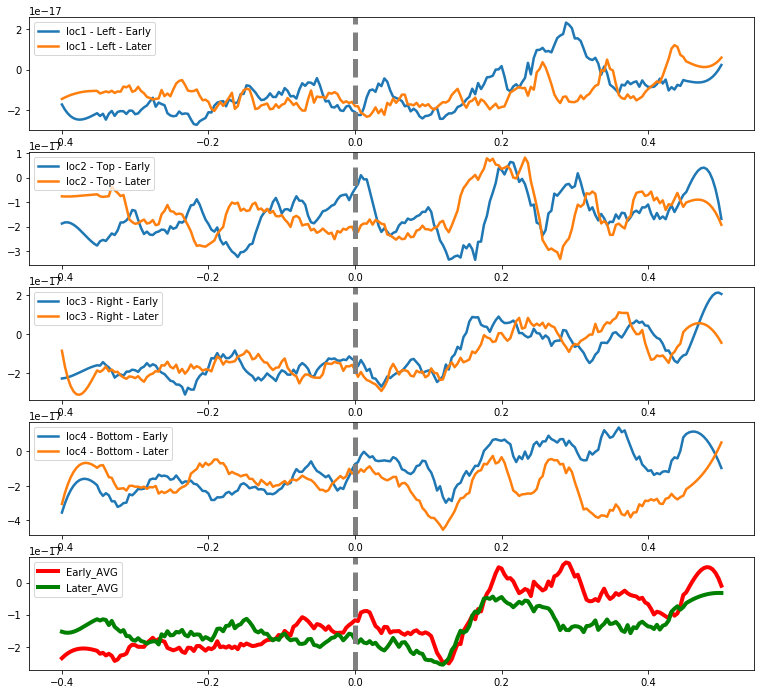

In [59]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(5,1,figsize=(13,12))

# window_length : int
# The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer.
# polyorder : int
# The order of the polynomial used to fit the samples. polyorder must be less than window_length.

# smooth_level = 11 # 11 * 4 = 45 ms
# smooth_level = 15 # 15 * 4 = 60 ms
smooth_level = 25 # 25 * 4 = 100 ms
# smooth_level = 51 # 51 * 4 = 204 ms

ply_order = 3
lw1=2.5
lw2=4

# window_length, polyorder

evk_data = np.mean(avgact_e, axis=1)
smooth_evk1_e = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2_e = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3_e = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4_e = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_e = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 


evk_data = np.mean(avgact_l, axis=1)
smooth_evk1_l = savgol_filter(evk_data[0,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk2_l = savgol_filter(evk_data[1,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk3_l = savgol_filter(evk_data[2,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evk4_l = savgol_filter(evk_data[3,:],window_length=smooth_level, polyorder=ply_order) 
smooth_evkavg_l = savgol_filter(np.mean(evk_data, 0),window_length=smooth_level, polyorder=ply_order) 





ax[0].plot(subset.times, smooth_evk1_e, linewidth=lw1)
ax[0].plot(subset.times, smooth_evk1_l, linewidth=lw1)
ax[0].legend(['loc1 - Left - Early', 'loc1 - Left - Later'], loc='upper left')

ax[1].plot(subset.times, smooth_evk2_e, linewidth=lw1)
ax[1].plot(subset.times, smooth_evk2_l, linewidth=lw1)
ax[1].legend(['loc2 - Top - Early', 'loc2 - Top - Later'], loc='upper left')

ax[2].plot(subset.times, smooth_evk3_e, linewidth=lw1)
ax[2].plot(subset.times, smooth_evk3_l, linewidth=lw1)
ax[2].legend(['loc3 - Right - Early', 'loc3 - Right - Later'], loc='upper left')

ax[3].plot(subset.times, smooth_evk4_e, linewidth=lw1)
ax[3].plot(subset.times, smooth_evk4_l, linewidth=lw1)
ax[3].legend(['loc4 - Bottom - Early', 'loc4 - Bottom - Later'], loc='upper left')


ax[4].plot(subset.times, smooth_evkavg_e, color='red', linewidth=lw2)
ax[4].plot(subset.times, smooth_evkavg_l, color='green', linewidth=lw2)
ax[4].legend(['Early_AVG', 'Later_AVG'], loc='upper left')


for ii in range(5):
    ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
plt.show()

In [ ]:
# from scipy.signal import savgol_filter

# fig, ax = plt.subplots(3,1,figsize=(15,14))

# # window_length : int
# # The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer.
# # polyorder : int
# # The order of the polynomial used to fit the samples. polyorder must be less than window_length.

# window_length = 10
# polyorder = 5
# lw1=2.5
# lw2=4



# evk_data = np.mean(avgact_e, axis=1)
# smooth_evk1 = savgol_filter(evk_data[0,:],window_length, polyorder) 
# smooth_evk2 = savgol_filter(evk_data[1,:],window_length, polyorder) 
# smooth_evk3 = savgol_filter(evk_data[2,:],window_length, polyorder) 
# smooth_evk4 = savgol_filter(evk_data[3,:],window_length, polyorder) 
# smooth_evkavg_e = savgol_filter(np.mean(evk_data, 0),window_length, polyorder) 
# ax[0].plot(subset.times, smooth_evk1, linewidth=lw1)
# ax[0].plot(subset.times, smooth_evk2, linewidth=lw1)
# ax[0].plot(subset.times, smooth_evk3, linewidth=lw1)
# ax[0].plot(subset.times, smooth_evk4, linewidth=lw1)
# ax[0].plot(subset.times, smooth_evkavg_e, color='black', linewidth=lw2)

# ax[0].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Early_AVG'], loc='upper left')



# evk_data = np.mean(avgact_l, axis=1)
# smooth_evk1 = savgol_filter(evk_data[0,:],window_length, polyorder) 
# smooth_evk2 = savgol_filter(evk_data[1,:],window_length, polyorder) 
# smooth_evk3 = savgol_filter(evk_data[2,:],window_length, polyorder) 
# smooth_evk4 = savgol_filter(evk_data[3,:],window_length, polyorder) 
# smooth_evkavg_l = savgol_filter(np.mean(evk_data, 0),window_length, polyorder) 

# ax[1].plot(subset.times, smooth_evk1, linewidth=lw1)
# ax[1].plot(subset.times, smooth_evk2, linewidth=lw1)
# ax[1].plot(subset.times, smooth_evk3, linewidth=lw1)
# ax[1].plot(subset.times, smooth_evk4, linewidth=lw1)
# ax[1].plot(subset.times, smooth_evkavg_l, color='black', linewidth=lw2)

# ax[1].legend(['loc1', 'loc2', 'loc3', 'loc4', 'Later_AVG'], loc='upper left')
# # plt.xticks(subset.times*1000)

# ax[2].plot(subset.times, smooth_evkavg_e, color='red', linewidth=lw2)
# ax[2].plot(subset.times, smooth_evkavg_l, color='green', linewidth=lw2)
# ax[2].legend(['Early_AVG', 'Later_AVG'], loc='upper left')

# for ii in range(3):
#     ax[ii].axvline(x=0, color='gray', linewidth=5., linestyle='--')
# plt.show()

In [ ]:
from scipy.signal import savgol_filter

fig, ax = plt.subplots(4,1,figsize=(15,14))



evk_data_e = np.mean(avgact_e, axis=1)
evk_data_l = np.mean(avgact_l, axis=1)


smooth_evke = savgol_filter(evk_data_e[0,:],23, 3) 
smooth_evkl = savgol_filter(evk_data_l[0,:],23, 3) 
ax[0].plot(smooth_evke, linewidth=4.0)
ax[0].plot(smooth_evkl, linewidth=4.0)
ax[0].legend(['loc1 Early', 'loc1 Later'])


smooth_evke = savgol_filter(evk_data_e[1,:],23, 3) 
smooth_evkl = savgol_filter(evk_data_l[1,:],23, 3) 
ax[1].plot(smooth_evke, linewidth=4.0)
ax[1].plot(smooth_evkl, linewidth=4.0)
ax[1].legend(['loc2 Early', 'loc2 Later'])



smooth_evke = savgol_filter(evk_data_e[2,:],23, 3) 
smooth_evkl = savgol_filter(evk_data_l[2,:],23, 3) 
ax[2].plot(smooth_evke, linewidth=4.0)
ax[2].plot(smooth_evkl, linewidth=4.0)
ax[2].legend(['loc3 Early', 'loc3 Later'])



smooth_evke = savgol_filter(evk_data_e[3,:],23, 3) 
smooth_evkl = savgol_filter(evk_data_l[3,:],23, 3) 
ax[3].plot(smooth_evke, linewidth=4.0)
ax[3].plot(smooth_evkl, linewidth=4.0)
ax[3].legend(['loc4 Early', 'loc4 Later'])



plt.show()

## Group by previous location

In [ ]:
subset = epochs['pred']['non'].copy()
subset = subset.pick_types(eeg=True)
subset.crop(tmin=-0.4,tmax=0.5)

if subset['Block==6'].metadata.Ptrn_Type.values.shape[0]>0:
       main_ptrn = subset['Block==6'].metadata.Ptrn_Type.values[0]
else:
       main_ptrn = subset['Block==8'].metadata.Ptrn_Type.values[0]

In [ ]:
# only later blocks
subset_E = subset['Block<11'].copy()
subset_E = subset['Block>6'].copy()

# Group data based on the previous trial
Grp1_E = subset_E['Trgt_Loc_prev==1'].copy()
Grp2_E = subset_E['Trgt_Loc_prev==2'].copy()
Grp3_E = subset_E['Trgt_Loc_prev==3'].copy()
Grp4_E = subset_E['Trgt_Loc_prev==4'].copy()
print(Grp1_E._data.shape)
print(Grp2_E._data.shape)
print(Grp3_E._data.shape)
print(Grp4_E._data.shape)

Grp1_E._data = (Grp1_E._data - np.mean(Grp1_E._data)) / np.std(Grp1_E._data)
Grp2_E._data = (Grp2_E._data - np.mean(Grp2_E._data)) / np.std(Grp2_E._data)
Grp3_E._data = (Grp3_E._data - np.mean(Grp3_E._data)) / np.std(Grp3_E._data)
Grp4_E._data = (Grp4_E._data - np.mean(Grp4_E._data)) / np.std(Grp4_E._data)



In [ ]:
# ind1=min( [Loc1_E._data.shape[0], Loc2_E._data.shape[0] , \
#            Loc3_E._data.shape[0], Loc4_E._data.shape[0]] )
# ind2=Loc1_E._data.shape[1]
# ind3=Loc1_E._data.shape[2]
# avgp1_autcrr = np.zeros((4, ind1, ind2, ind3))
# avgp1_autcrr[0,:,:,:]=Loc1_E._data[:ind1,:,:]
# avgp1_autcrr[1,:,:,:]=Loc2_E._data[:ind1,:,:]
# avgp1_autcrr[2,:,:,:]=Loc3_E._data[:ind1,:,:]
# avgp1_autcrr[3,:,:,:]=Loc4_E._data[:ind1,:,:]
# avgact_e = np.mean(avgp1_autcrr, axis=1)

In [ ]:
dtset=subset_E.copy()




inds = np.zeros((4,1))
for iind in range(4):
    inds[iind] = dtset['Trgt_Loc_prev==%s' %(iind+1)]._data.shape[0]


ind1=int(min(inds))
ind2=dtset['Trgt_Loc_prev==1']._data.shape[1]
ind3=dtset['Trgt_Loc_prev==1']._data.shape[2]
print(min_inds)

avgp1_autcrr = np.zeros((4, ind1, ind2, ind3))
for iloc in range(4):
    print(iloc)
    dt = dtset['Trgt_Loc_prev==%s' %(iind+1)]._data
    print(dt.shape)
    dt = dt[:ind1,:,:]
    print(dt.shape)
    dt = dt - np.mean(dt) / np.std(dt)
    print(dt.shape)
    avgp1_autcrr[iloc,:,:,:] = dt
    
print(avgp1_autcrr.shape)

In [ ]:
min_inds=int(min_inds)
print(dt[:min_inds,:,:].shape)

In [ ]:
# only later blocks
subsetL = subset['Block<11'].copy()
subsetL = subset['Block>6'].copy()

# Group data based on the previous trial
Grp1L = subsetL['Trgt_Loc_prev==1'].copy()
Grp2L = subsetL['Trgt_Loc_prev==2'].copy()
Grp3L = subsetL['Trgt_Loc_prev==3'].copy()
Grp4L = subsetL['Trgt_Loc_prev==4'].copy()
print(Grp1L._data.shape)
print(Grp2L._data.shape)
print(Grp3L._data.shape)
print(Grp4L._data.shape)

Grp1L._data = (Grp1L._data - np.mean(Grp1L._data)) / np.std(Grp1L._data)
Grp2L._data = (Grp2L._data - np.mean(Grp2L._data)) / np.std(Grp2L._data)
Grp3L._data = (Grp3L._data - np.mean(Grp3L._data)) / np.std(Grp3L._data)
Grp4L._data = (Grp4L._data - np.mean(Grp4L._data)) / np.std(Grp4L._data)

# calculate autocorrelation for each location

In [ ]:
map_r_l = np.zeros((4, Loc1_E._data.shape[2], Loc1_E._data.shape[2]))

data = Loc1_L._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_l[0,:,:] = generate_correlation_map(x1, x1)

data = Loc2_L._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_l[1,:,:] = generate_correlation_map(x1, x1)

data = Loc3_L._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_l[2,:,:] = generate_correlation_map(x1, x1)

data = Loc4_L._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_l[3,:,:] = generate_correlation_map(x1, x1)




map_r_e = np.zeros((4, Loc1_E._data.shape[2], Loc1_E._data.shape[2]))

data = Loc1_E._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_e[0,:,:] = generate_correlation_map(x1, x1)

data = Loc2_E._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_e[1,:,:] = generate_correlation_map(x1, x1)

data = Loc3_E._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_e[2,:,:] = generate_correlation_map(x1, x1)

data = Loc4_E._data
dt = np.mean(data, axis=1) #avg over channels
x1 = np.transpose(dt)
map_r_e[3,:,:] = generate_correlation_map(x1, x1)

map_r_d = map_r_l - map_r_e

In [ ]:
print(map_r_l.shape)
print(map_r_e.shape)
print(map_r_d.shape)

In [ ]:
#  plot ------------- #
vmin=-1
vmax=1
title='noneFilterNoBasline'
plot_autocorr_eachGrp(title, avgmap_e, avgmap_l, avgmap_d, vmin, vmax)